In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import os

In [273]:
print(os.getcwd())

C:\Users\taroo\Desktop\compro\MoviePicks_Project\CSVs_files


In [274]:

orig_df = pd.read_csv('orig_movie_with_links.csv', lineterminator='\n')

orig_df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,imdb_link,poster_link\r
0,0,385687,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,https://imdb.com/title/tt5433140/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNzZmOT...
1,1,603692,John Wick: Chapter 4,2023-03-22,"['Action', 'Thriller', 'Crime']",English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out.",https://imdb.com/title/tt10366206/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BMDExZG...
2,2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Family', 'Adventure', 'Fantasy'...",English,7.8,4628,3394.458,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1308766975,92,NaN,https://imdb.com/title/tt6718170/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BOTJhNz...
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31,"['Action', 'Adventure', 'Animation', 'Science ...",English,8.8,1160,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000,"['Columbia Pictures', 'Sony Pictures Animation...",313522201,140,It's how you wear the mask that matters,https://imdb.com/title/tt9362722/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BMzI0Nm...
4,4,536437,Hypnotic,2023-05-11,"['Mystery', 'Thriller', 'Science Fiction']",English,6.5,154,2654.854,A detective becomes entangled in a mystery inv...,70000000,"['Studio 8', 'Solstice Productions', 'Ingeniou...",0,94,Control is an illusion.,https://imdb.com/title/tt8080204/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNmNmNW...


In [275]:
orig_df.shape

(10000, 17)

In [276]:
orig_df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline', 'imdb_link', 'poster_link\r'],
      dtype='object')

In [277]:
orig_df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
imdb_link                object
poster_link\r            object
dtype: object

Handling missing data

In [278]:
null_percent = orig_df.isnull().sum() / len(orig_df) * 100
null_percent

Unnamed: 0               0.00
id                       0.00
title                    0.00
release_date             0.23
genres                   0.00
original_language        0.00
vote_average             0.00
vote_count               0.00
popularity               0.00
overview                 0.76
budget                   0.00
production_companies     0.00
revenue                  0.00
runtime                  0.00
tagline                 26.17
imdb_link                2.44
poster_link\r            0.00
dtype: float64

) missing from current font.\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: >

) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


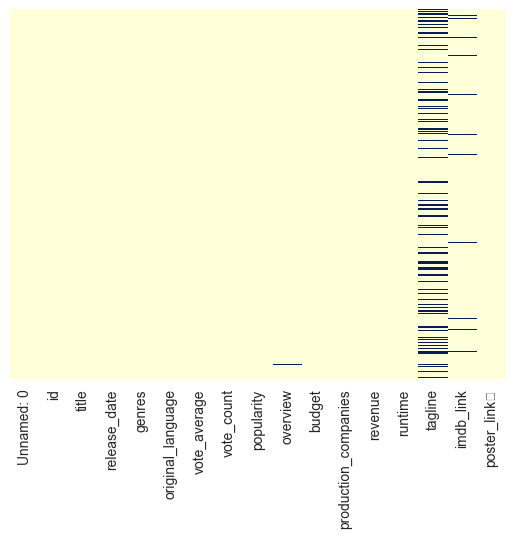

In [279]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [280]:
df = orig_df.copy()
df.dtypes

Unnamed: 0                int64
id                        int64
title                    object
release_date             object
genres                   object
original_language        object
vote_average            float64
vote_count                int64
popularity              float64
overview                 object
budget                    int64
production_companies     object
revenue                   int64
runtime                   int64
tagline                  object
imdb_link                object
poster_link\r            object
dtype: object

In [281]:
nan_rows = df[df['release_date'].isna()]
nan_rows

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,imdb_link,poster_link\r
1072,1072,626412,Alienoid: Part 2,NaN,[],Korean,0.0,0,47.439,NaN,0,['Caper Film'],0,0,NaN,https://imdb.com/title/tt20168564/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BNWJiMm...
1298,1298,1034541,Terrifier 3,NaN,"['Horror', 'Fantasy', 'Thriller']",English,0.0,0,41.450,"In the aftermath of Terrifier 2, the third ins...",0,"['Dark Age Cinema', 'Fuzz on the Lens Producti...",0,0,NaN,https://imdb.com/title/tt27911000/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BZTcxYT...
1537,1537,421892,Shrek 5,NaN,"['Animation', 'Family', 'Comedy', 'Fantasy']",English,0.0,0,37.458,"Plot unknown. A soft-reboot of the animated ""S...",0,['DreamWorks Animation'],0,0,NaN,https://imdb.com/title/tt2847524/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BYWQ3Mj...
1593,1593,969681,Spider-Man 4,NaN,['Action'],English,0.0,0,36.681,The next installment of the MCU Spider-Man fra...,0,"['Marvel Studios', 'Columbia Pictures', 'Pasca...",0,0,NaN,https://imdb.com/title/tt28491417/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BNTU2OT...
1642,1642,1108427,Moana,NaN,"['Adventure', 'Comedy', 'Family', 'Fantasy']",English,0.0,0,35.976,"In Ancient Polynesia, when a terrible curse in...",0,"['Walt Disney Pictures', 'Seven Bucks Producti...",0,0,NaN,https://imdb.com/title/tt3521164/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BMjI4Mz...
2216,2216,1126217,Fast X: Part 3,NaN,[],English,0.0,0,30.089,The twelfth and potentially final installment ...,0,[],0,0,NaN,https://imdb.com/title/tt27550022/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BNjQzMm...
2704,2704,631969,Kingsman: The Blue Blood,NaN,"['Action', 'Comedy', 'Adventure']",English,0.0,0,26.741,The upcoming fourth installment in the Kingsma...,0,"['Marv Films', '20th Century Studios']",0,0,NaN,https://imdb.com/title/tt29529698/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BNjQ3NG...
2737,2737,730629,John Wick: Chapter 5,NaN,"['Action', 'Adventure', 'Crime', 'Thriller']",English,0.0,0,26.483,The fifth installment in the John Wick franchi...,0,"['Summit Entertainment', 'Thunder Road']",0,0,NaN,https://imdb.com/title/tt12844100/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BN2Q5Nj...
3359,3359,504075,Wolf Warrior 3,NaN,"['Action', 'War']",Chinese,0.0,0,23.506,The third movie about a Chinese special force ...,0,[],0,90,NaN,https://imdb.com/title/tt3540136/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BYjM3OW...
3442,3442,553301,Your Name,NaN,"['Drama', 'Fantasy', 'Romance']",English,0.0,0,23.115,Two teenagers discover they are magically and ...,0,['Bad Robot'],0,0,NaN,https://imdb.com/title/tt5311514/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BODRmZD...


) missing from current font.\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: >

) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


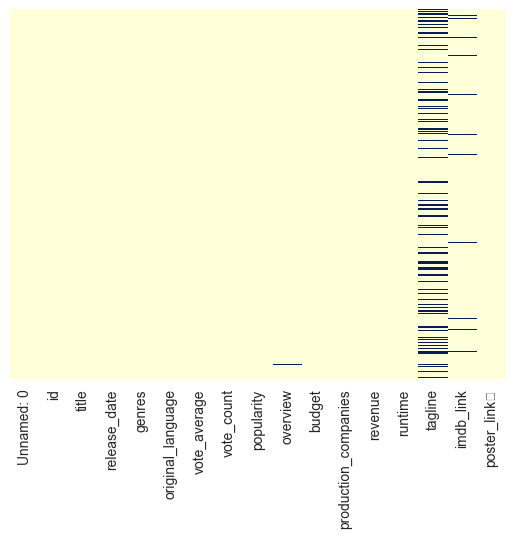

In [282]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [283]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [284]:
df['overview'] = df['overview'].fillna('N/A')
df['tagline'] = df['tagline'].fillna('N/A')
df[df['genres'].str.len() == 2]
df = df[~df['original_language'].isin(['xx', 'sh'])]
# df['imdb_link'] = df['imdb_link'].fillna('')
df = df.dropna(subset=['release_date', 'genres'])
df = df.reset_index(drop=True)


) missing from current font.\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()


<Axes: >

) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 13 (
  func(*args, **kwargs)
) missing from current font.\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


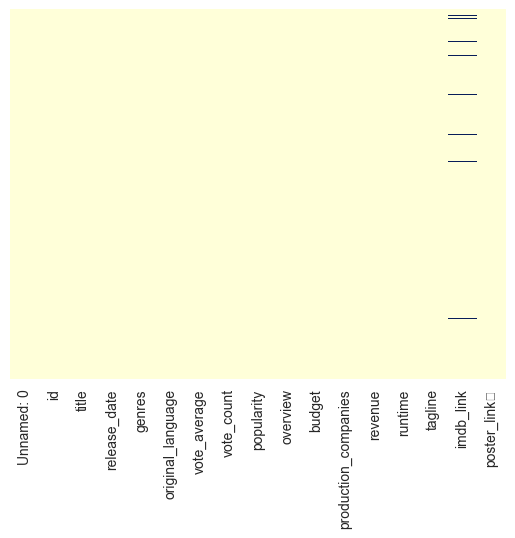

In [285]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

Distribution and Ranges of Values

In [286]:
df.dropna(inplace=True)

In [287]:
nan_rows = df[df['release_date'].isna()]
nan_rows

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,imdb_link,poster_link\r


In [288]:
df.isnull().sum()

Unnamed: 0              0
id                      0
title                   0
release_date            0
genres                  0
original_language       0
vote_average            0
vote_count              0
popularity              0
overview                0
budget                  0
production_companies    0
revenue                 0
runtime                 0
tagline                 0
imdb_link               0
poster_link\r           0
dtype: int64

In [289]:
# Separate the genres
df['genres'] = df['genres'].apply(lambda x: eval(x))

df_separated_genres = df.explode('genres')
df_separated_genres.reset_index(drop=True, inplace=True)
df_separated_genres

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline,imdb_link,poster_link\r
0,0,385687,Fast X,2023-05-17,Action,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,https://imdb.com/title/tt5433140/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNzZmOT...
1,0,385687,Fast X,2023-05-17,Crime,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,https://imdb.com/title/tt5433140/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNzZmOT...
2,0,385687,Fast X,2023-05-17,Thriller,English,7.4,1347,8363.473,Over many missions and against impossible odds...,340000000,"['Universal Pictures', 'Original Film', 'One R...",652000000,142,The end of the road begins.,https://imdb.com/title/tt5433140/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNzZmOT...
3,1,603692,John Wick: Chapter 4,2023-03-22,Action,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out.",https://imdb.com/title/tt10366206/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BMDExZG...
4,1,603692,John Wick: Chapter 4,2023-03-22,Thriller,English,7.9,2896,4210.313,"With the price on his head ever increasing, Jo...",90000000,"['Thunder Road', '87Eleven', 'Summit Entertain...",431769198,170,"No way back, one way out.",https://imdb.com/title/tt10366206/?ref_=fn_tt_...,https://m.media-amazon.com/images/M/MV5BMDExZG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25356,9997,28774,Communion,1989-11-10,Science Fiction,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...,https://imdb.com/title/tt0097100/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BODdhZT...
25357,9997,28774,Communion,1989-11-10,Thriller,English,5.3,147,12.300,A novelist's wife and son see him changed by a...,5000000,"['The Picture Property Company', 'Allied Visio...",1919653,103,The true story of one man's terrifying journey...,https://imdb.com/title/tt0097100/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BODdhZT...
25358,9998,11121,Tess,1979-10-06,Drama,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...,https://imdb.com/title/tt0080009/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNTU2NW...
25359,9998,11121,Tess,1979-10-06,Romance,English,7.0,283,12.300,A strong-willed peasant girl is sent by her fa...,12000000,"['Renn Productions', 'Timothy Burrill Producti...",20101247,186,She was born into a world where they called it...,https://imdb.com/title/tt0080009/?ref_=fn_tt_tt_1,https://m.media-amazon.com/images/M/MV5BNTU2NW...


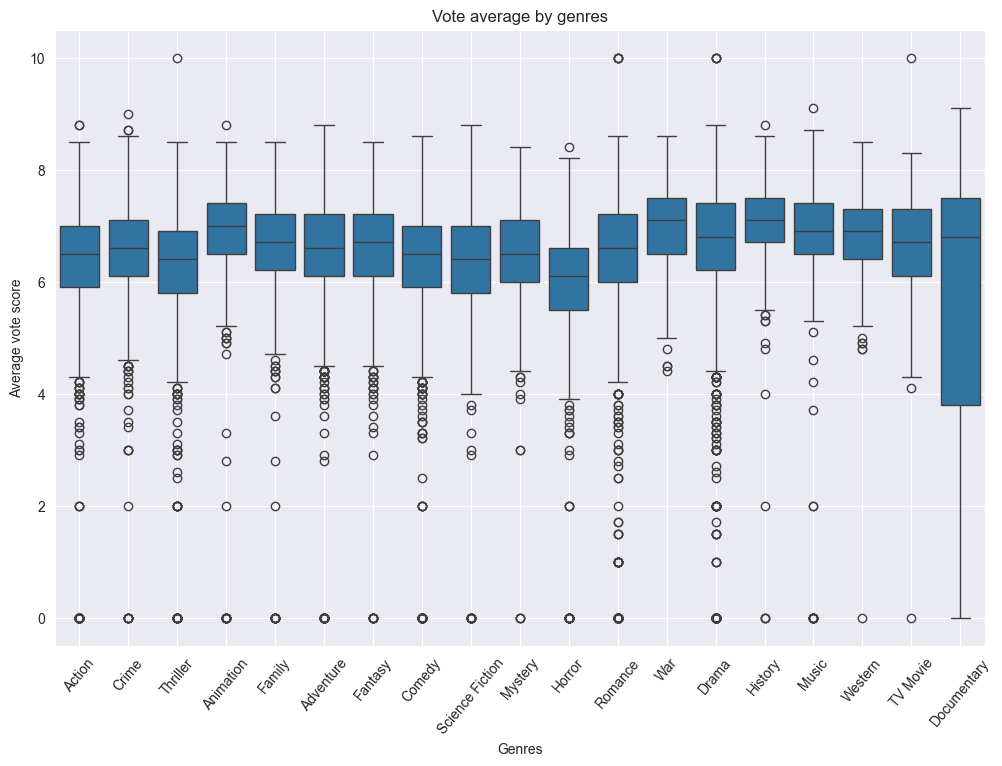

In [290]:
# Vote average by genres



plt.figure(figsize=(12,8))
sns.boxplot(x='genres', y='vote_average', data=df_separated_genres)

plt.title('Vote average by genres')
plt.xlabel('Genres')
plt.ylabel('Average vote score')
plt.grid('True')
plt.xticks(rotation=50)
plt.show()


In [291]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9970                                   [Romance, Drama]
9971                                  [Comedy, Mystery]
9972         [Drama, Horror, Science Fiction, Thriller]
9973                                   [Drama, Romance]
9974                                           [Horror]
Name: genres, Length: 9732, dtype: object

Adding profit column in DataFrame

In [292]:
df['profit'] = df['revenue'] - df['budget']
df_separated_genres['profit'] = df_separated_genres['revenue'] - df['budget']

In [293]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year']= df['release_date'].dt.year
df['release_year']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
9970    2006
9971    1982
9972    1989
9973    1979
9974    2014
Name: release_year, Length: 9732, dtype: int32

In [294]:
df.dtypes

Unnamed: 0                       int64
id                               int64
title                           object
release_date            datetime64[ns]
genres                          object
original_language               object
vote_average                   float64
vote_count                       int64
popularity                     float64
overview                        object
budget                           int64
production_companies            object
revenue                          int64
runtime                          int64
tagline                         object
imdb_link                       object
poster_link\r                   object
profit                           int64
release_year                     int32
dtype: object

In [295]:
df.to_csv('movies_with_links.csv', index=False)

In [296]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
# max_va

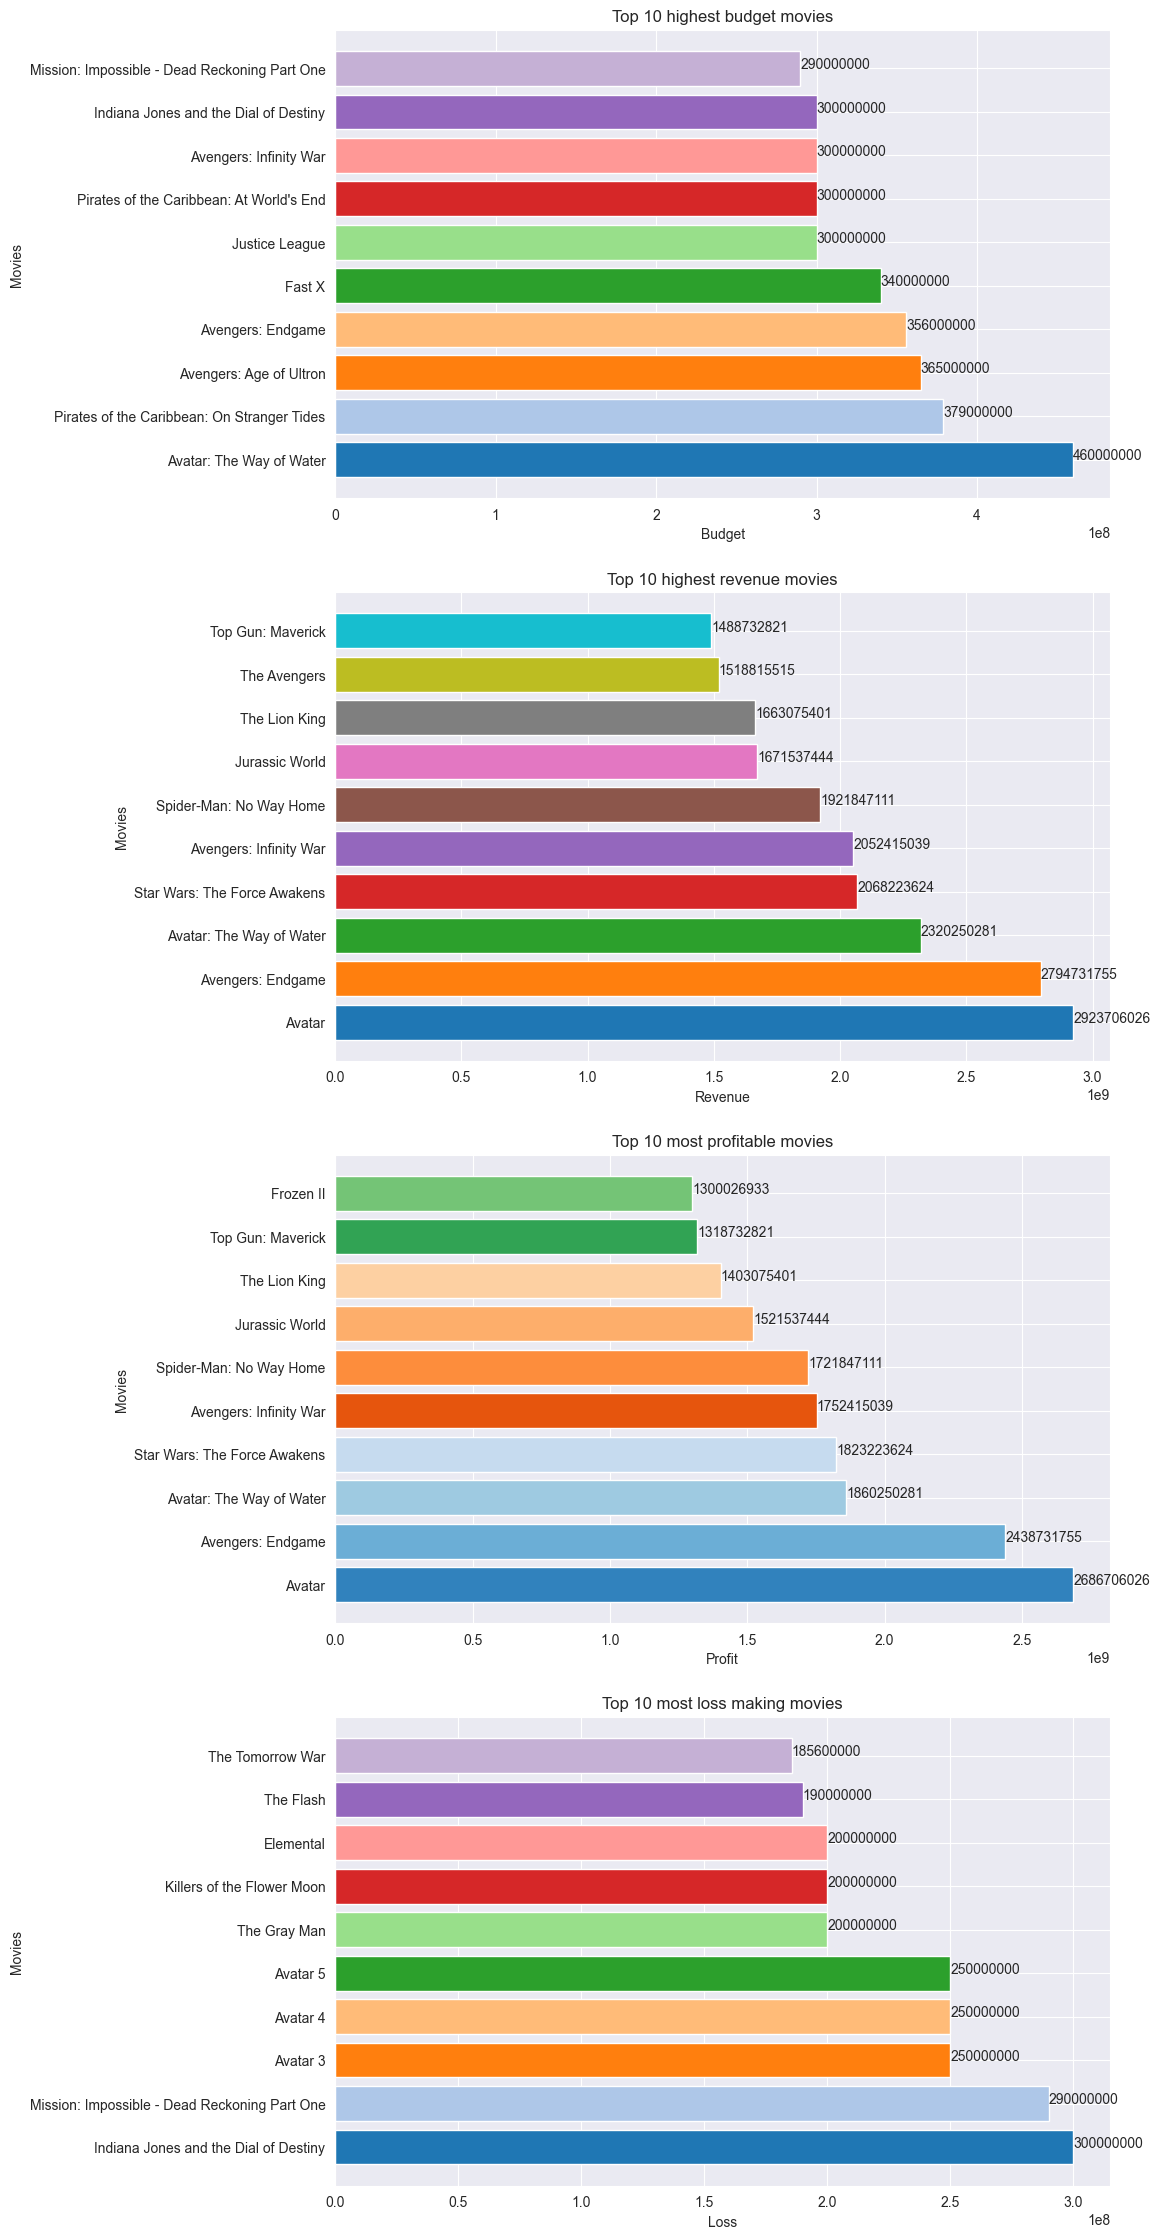

In [297]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

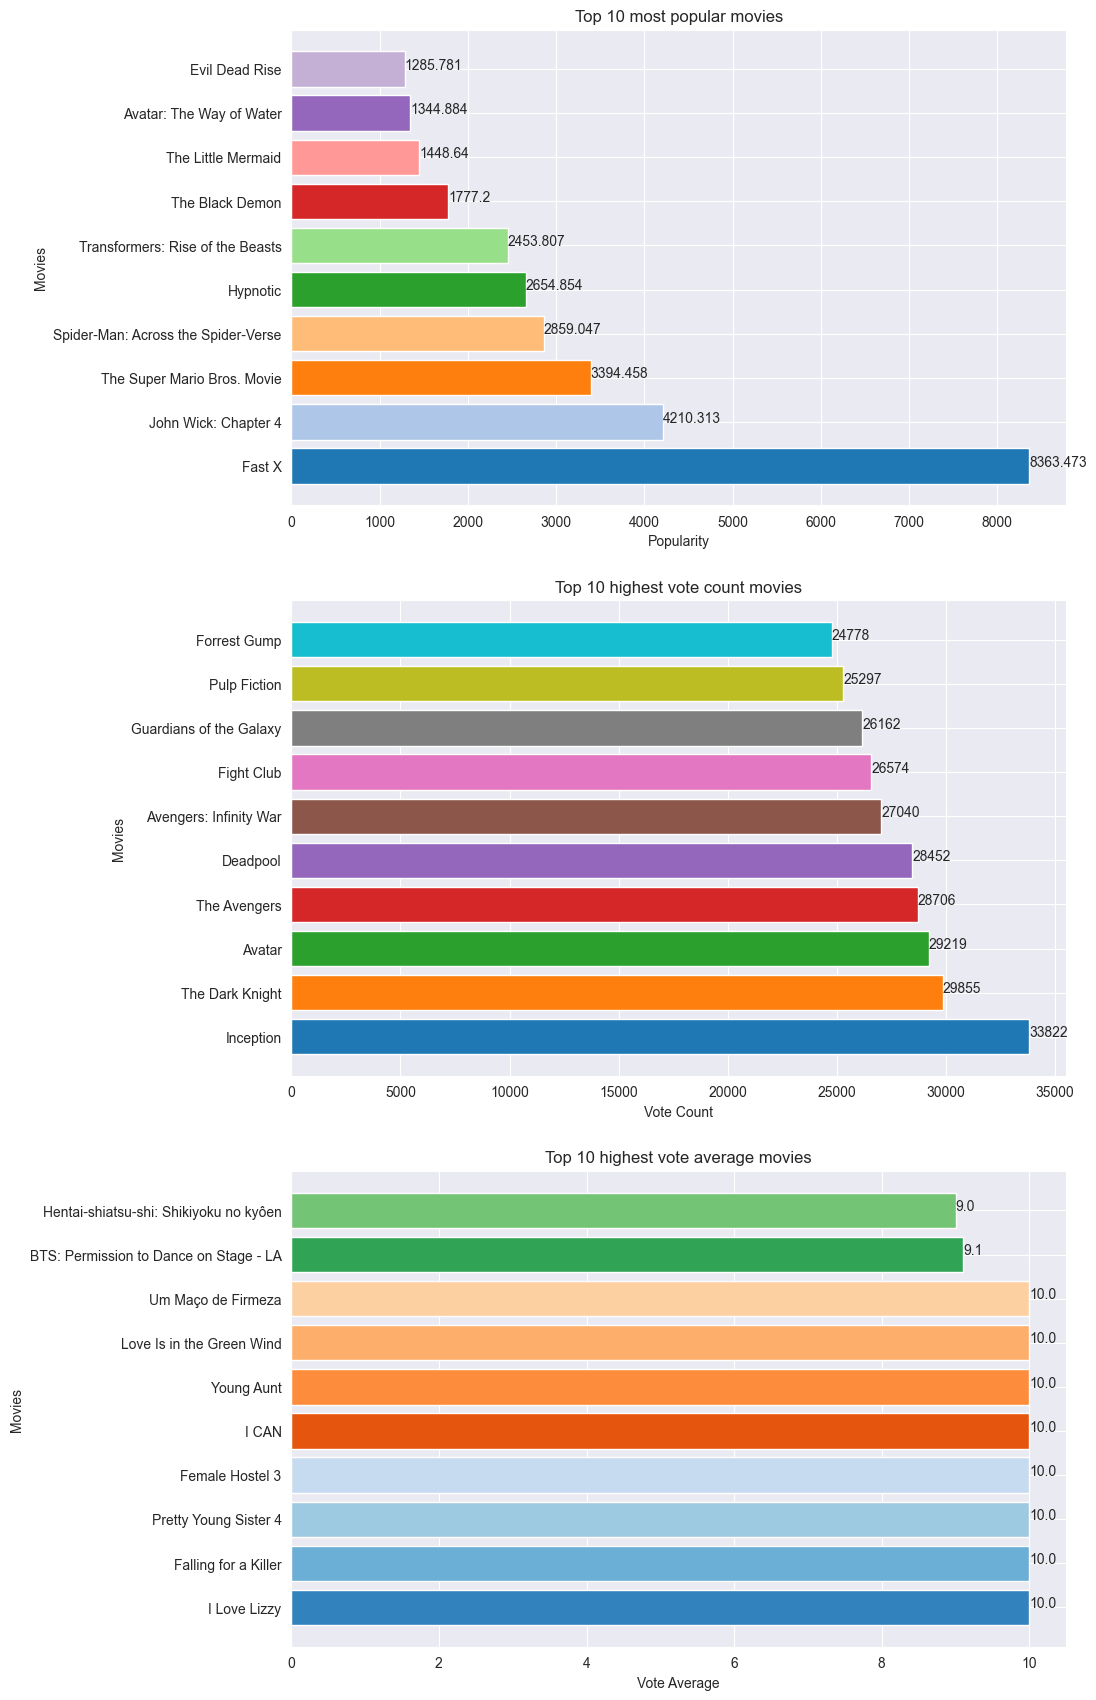

In [298]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()


Movies by their language

In [299]:
df_separated_genres['genres'].value_counts()

genres
Drama              3804
Comedy             2872
Action             2642
Thriller           2526
Adventure          1836
Romance            1597
Horror             1425
Animation          1311
Family             1306
Fantasy            1267
Crime              1232
Science Fiction    1202
Mystery             823
History             417
War                 296
Music               275
TV Movie            169
Documentary         165
Western             153
Name: count, dtype: int64

In [300]:
df['original_language'].value_counts()

original_language
English             7169
Japanese             626
Korean               358
French               328
Spanish              279
cn                   153
Italian              148
Chinese              148
German                87
Russian               66
Tagalog               47
Portuguese            46
Hindi                 32
Norwegian             28
Danish                26
Swedish               25
Dutch                 23
Thai                  22
Turkish               20
Polish                17
Indonesian            11
Finnish                8
Tamil                  7
Telugu                 7
Arabic                 6
Greek                  6
Ukrainian              4
Vietnamese             3
Basque                 3
Romanian               3
Persian                3
Galician               2
Czech                  2
Icelandic              2
Serbian                2
Khmer                  1
Oriya                  1
Haitian                1
Hungarian              1
Norwegi

In [301]:
df['genres']

0                             [Action, Crime, Thriller]
1                             [Action, Thriller, Crime]
2       [Animation, Family, Adventure, Fantasy, Comedy]
3       [Action, Adventure, Animation, Science Fiction]
4                  [Mystery, Thriller, Science Fiction]
                             ...                       
9970                                   [Romance, Drama]
9971                                  [Comedy, Mystery]
9972         [Drama, Horror, Science Fiction, Thriller]
9973                                   [Drama, Romance]
9974                                           [Horror]
Name: genres, Length: 9732, dtype: object

In [302]:
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

TypeError: eval() arg 1 must be a string, bytes or code object

In [ ]:
df_separated_genres

In [ ]:
df['genres'].isnull().sum()

In [ ]:

df_separated_genres.columns


In [ ]:
df_separated_genres['profit'] = df_separated_genres['revenue'] - df_separated_genres['budget']

# Group by genre
genre_groups = df_separated_genres.groupby('genres')

# Find the most profitable movie in each genre
most_profitable_movies = genre_groups.apply(lambda x: x.loc[x['profit'].idxmax()])

# Display the most profitable movies for each genre
print(most_profitable_movies[['genres', 'title', 'profit']])

5 Most profitable movies for every genres

In [ ]:

for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('profit', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Top 5 most popular movies.

In [ ]:
for genre in df_separated_genres['genres'].unique():
    # Filter movies by genre and sort by profit
    movies = df_separated_genres[df_separated_genres['genres'].str.contains(genre, na=False)].sort_values('popularity', ascending=False).head(5)
    movie_titles = movies['title'].values
    print(genre)
    for i, title in enumerate(movie_titles):
        print(i + 1, title)
    print("\n")

Story telling: Thai Movies

In [ ]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies

In [ ]:
thai_movies = df[df['original_language'] == "Thai"]
thai_movies[['title','release_date','budget','revenue']]

In [ ]:
no_zeros = df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]
japanese_movies = no_zeros[no_zeros['original_language'] == "Japanese"]
japanese_movies

In [ ]:
thai_movies.describe()

In [ ]:
# top 10 most popular thai movies

thai_movies_most_popular = thai_movies.sort_values('vote_count', ascending=False).sort_values('vote_count', ascending=False).sort_values('vote_average', ascending=False).head(10)
thai_movies_most_popular

In [ ]:
# top 5 most profitable thai movies

thai_movies_most_profitable = thai_movies.sort_values('profit', ascending=False)
thai_movies_most_profitable

In [ ]:
df['original_language'].value_counts()

In [ ]:
df_separated_genres

In [ ]:

# Calculate descriptive statistics
descriptive_stats = df[['revenue', 'budget', 'popularity', 'vote_average']].describe()
# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()
descriptive_stats, correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df[['revenue', 'budget', 'popularity', 'vote_average']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.title('Scatter Plot of Profit vs Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='profit', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Profit vs Budget with Trend Line')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()